# Análisis Exploratorio de Datos (EDA)

#### El análisis exploratorio de datos es una fase crítica en la que buscamos descubrir patrones, relaciones y características importantes en los datos, con el fin de responder a las preguntas clave del proyecto.

In [28]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Cargamos el dataframe
df = pd.read_csv("../data/processed/cleaning_data.csv")

## Comprensión de la distribución de las variables

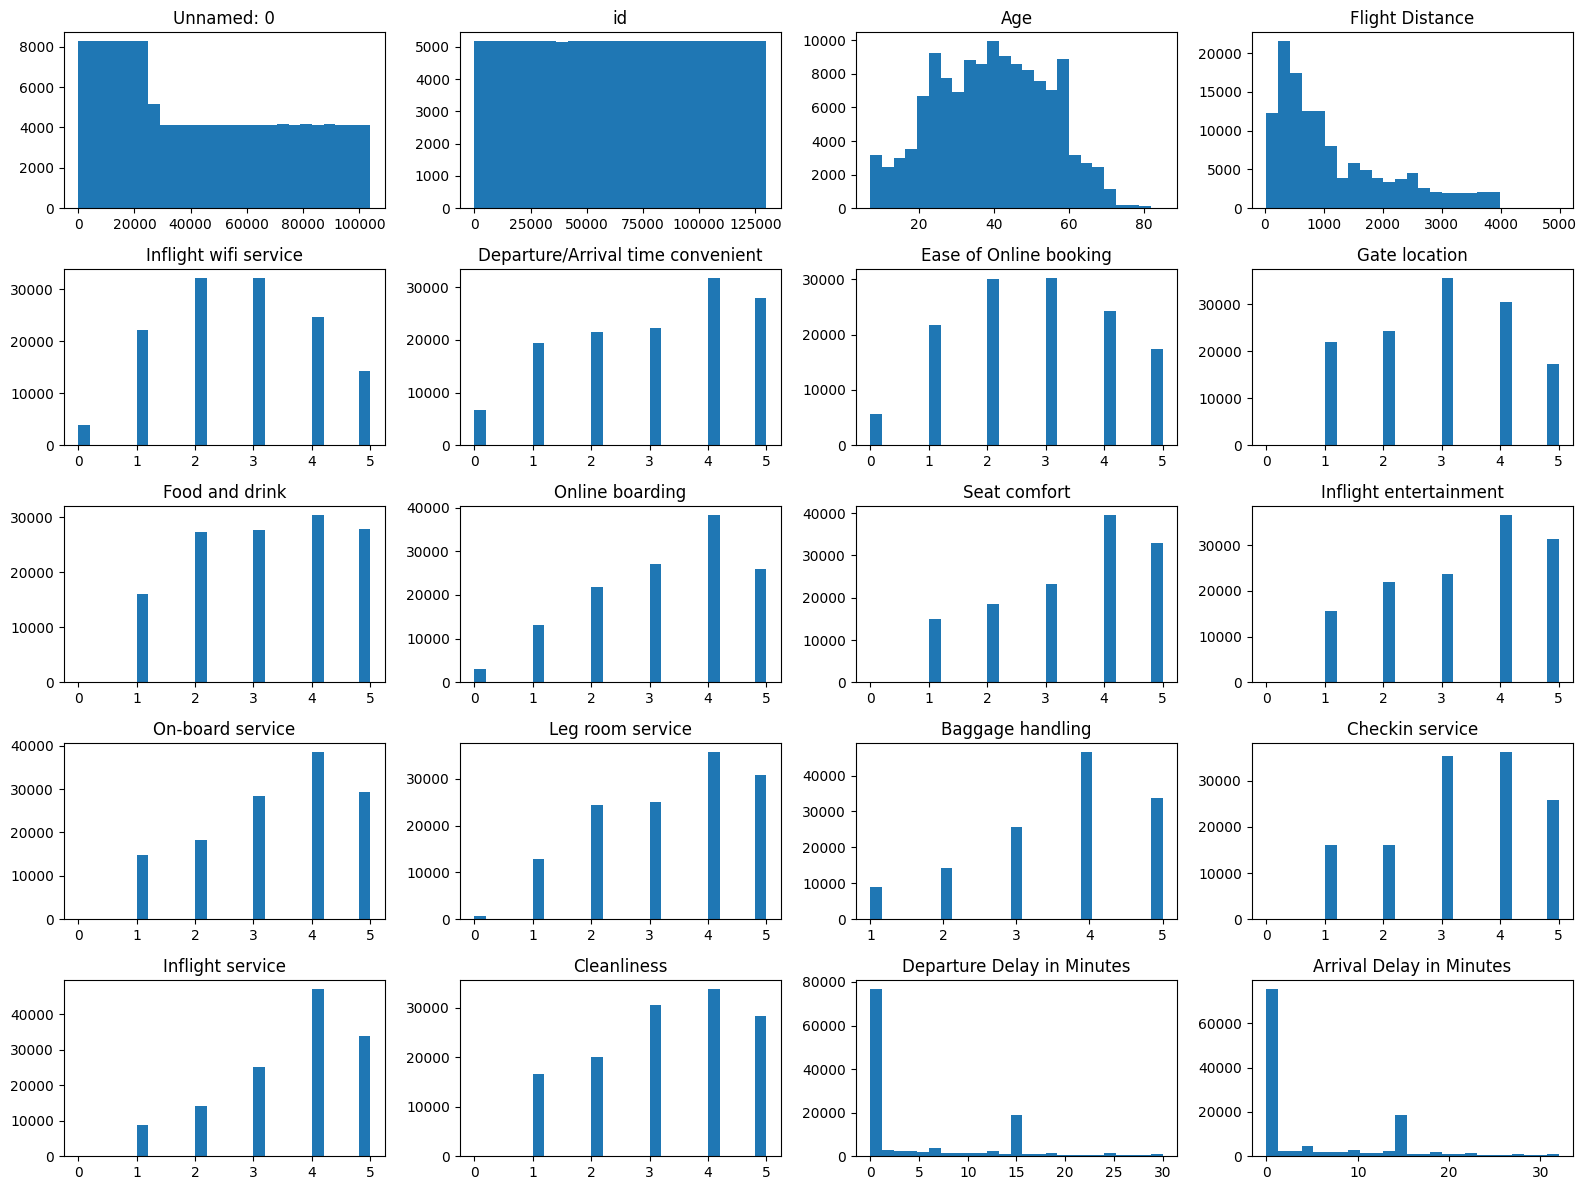

In [30]:
# Histograma de variables categoricas
df.hist(bins=25, figsize=(16, 12), grid=False)
plt.tight_layout()
plt.show()

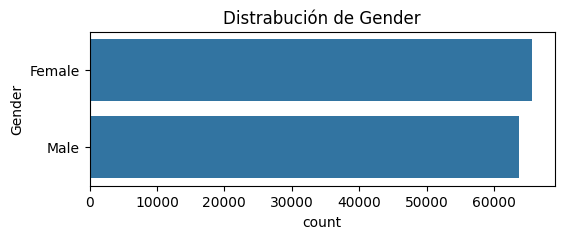

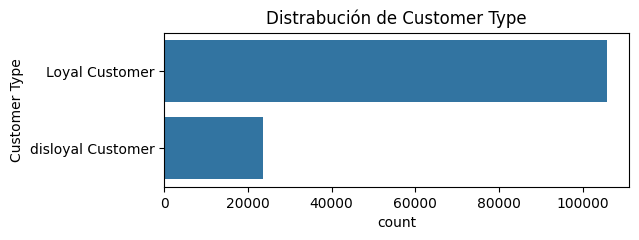

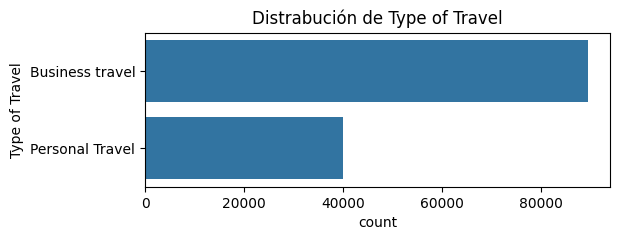

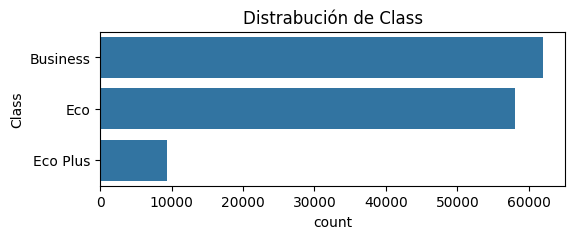

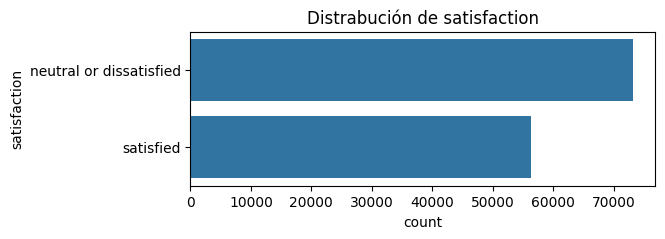

In [31]:
# Grafico de barras para variables categóricas
for i in df.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(6, 2))
    sns.countplot(y=i, data=df, order=df[i].value_counts().index)
    plt.title(f"Distrabución de {i}")
    plt.show()

## Relaciones entre variables

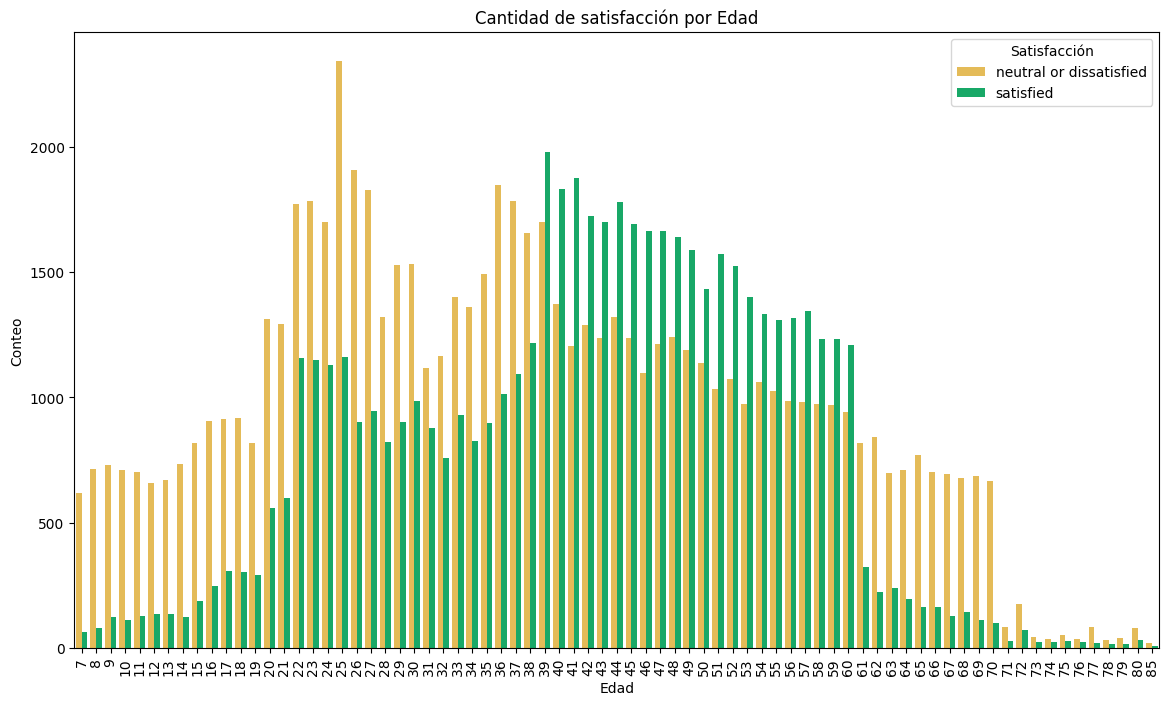

In [32]:
# Creamos colores personalizados en función del tipo de satisfacción
satisfaction_color = {"satisfied": "#00c069", "neutral or dissatisfied": "#fbc441"}

# Creamos un gráfico de conteo, agrupado por edad y satisfacción
plt.figure(figsize=(14, 8))
sns.countplot(x="Age", hue="satisfaction", data=df, palette=(satisfaction_color))
plt.title("Cantidad de satisfacción por Edad")
plt.xlabel("Edad")
plt.ylabel("Conteo")
plt.legend(title="Satisfacción")
plt.xticks(rotation=90)
plt.show()

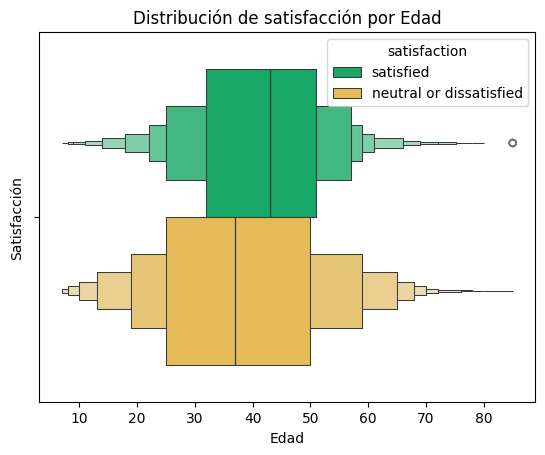

In [33]:
# Crea un boxenplot para visualizar la distribución de la satisfacción por grupos de edad.
sns.boxenplot(x="Age", hue="satisfaction", data=df, palette=satisfaction_color)
plt.title("Distribución de satisfacción por Edad")
plt.xlabel("Edad")
plt.ylabel("Satisfacción")
plt.show()

**Observaciones:** Tanto el histograma como los boxplots muestran que los pasajeros satisfechos se concentran en un rango de edad más alto (32-52 años), con menor variabilidad en sus edades. En cambio, los pasajeros neutrales y/o insatisfechos abarcan un rango de edad más amplio y disperso (25-50 años), lo que sugiere que los pasajeros más jóvenes tienden a estar menos satisfechos con el servicio.

### Identificación de correlaciones

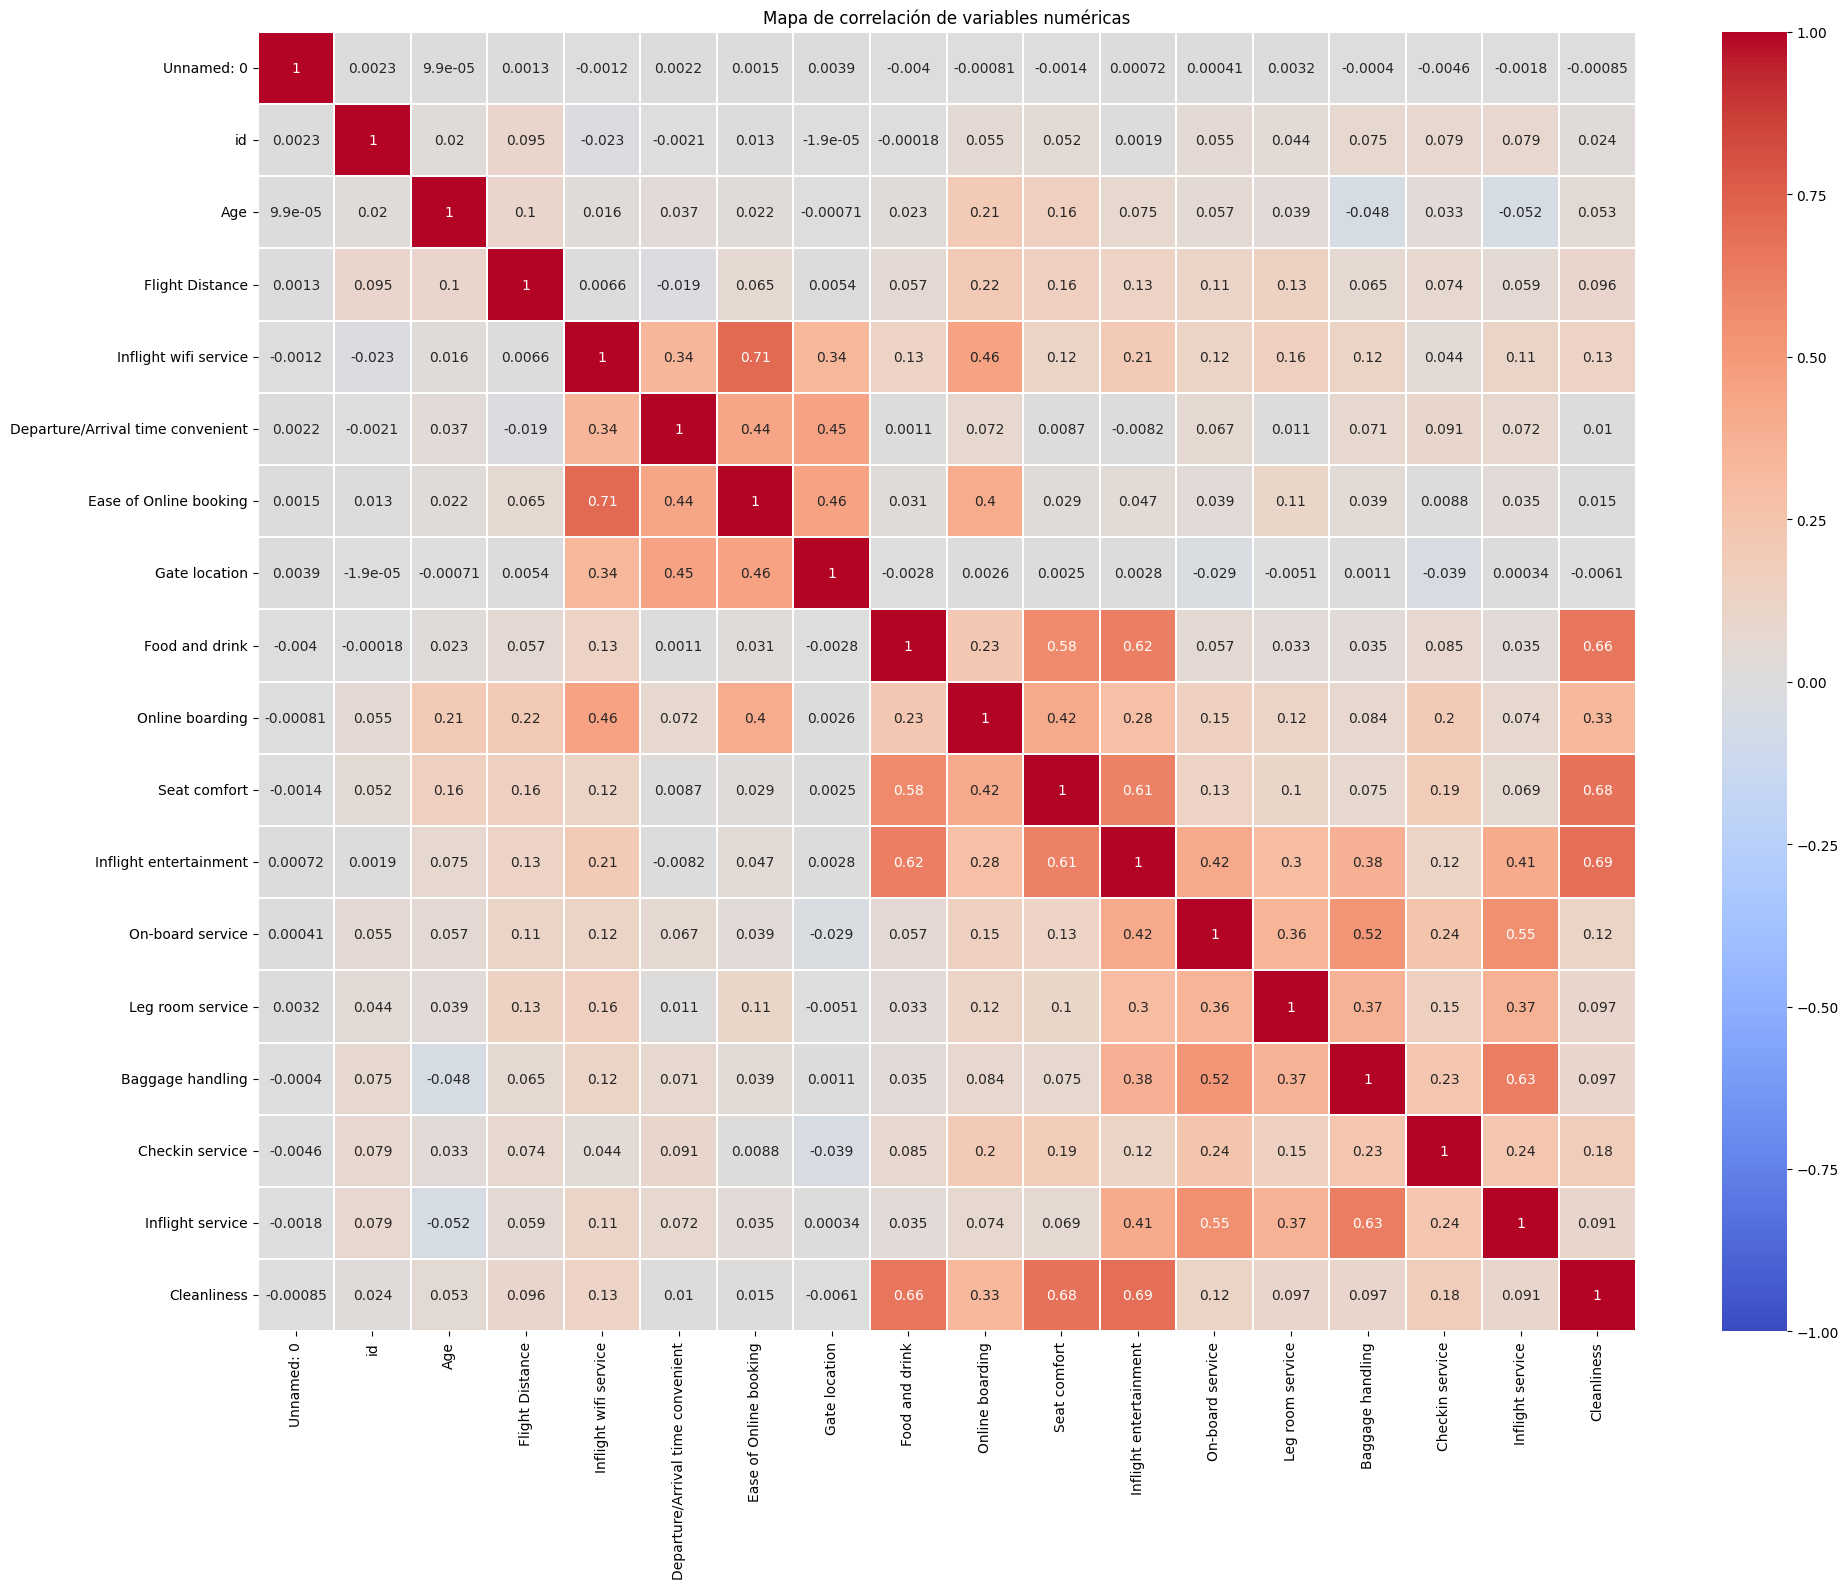

In [34]:
# Seleccionamos solo las columnas numéricas
df_num_col = df.select_dtypes(include=("int64"))

# Calculamos la correlación en nuestras columnas numéricas
df_correlation = df_num_col.corr()

# Creamos un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 16))
sns.heatmap(df_correlation, annot=True, cmap="coolwarm", vmax=1, vmin=-1, linewidths=0.25)
plt.title("Mapa de correlación de variables numéricas")
plt.tight_layout()
plt.show()

**Observaciones:** Ease of Online Booking vs Inflight WiFi Service (0.73):
Existe una relación positiva fuerte entre la facilidad de reserva online y la satisfacción con el WiFi en vuelo. Esto sugiere que los pasajeros con buenas experiencias tecnológicas en la reserva también valoran mejor el servicio de WiFi, indicando la importancia de la infraestructura digital en la experiencia global.

Inflight Entertainment vs Food and Drink (0.63) y Seat Comfort (0.62):
Los pasajeros que disfrutan del entretenimiento a bordo tienden a estar más satisfechos con la comida y bebida, así como con la comodidad del asiento. Esto indica que un buen entretenimiento puede mejorar la percepción de otros aspectos de la experiencia durante el vuelo.

Cleanliness vs Food and Drink (0.66), Seat Comfort (0.67) y Inflight Entertainment (0.70):
La limpieza tiene una fuerte correlación con la satisfacción en cuanto a la comida, los asientos y el entretenimiento. Un entorno limpio mejora considerablemente la percepción de otros servicios, lo que subraya la importancia de mantener altos estándares de higiene a bordo.

## Análisis detallado para responder preguntas del proyecto

### 1. ¿Cuáles son las variables que más afectan la satisfacción del cliente?

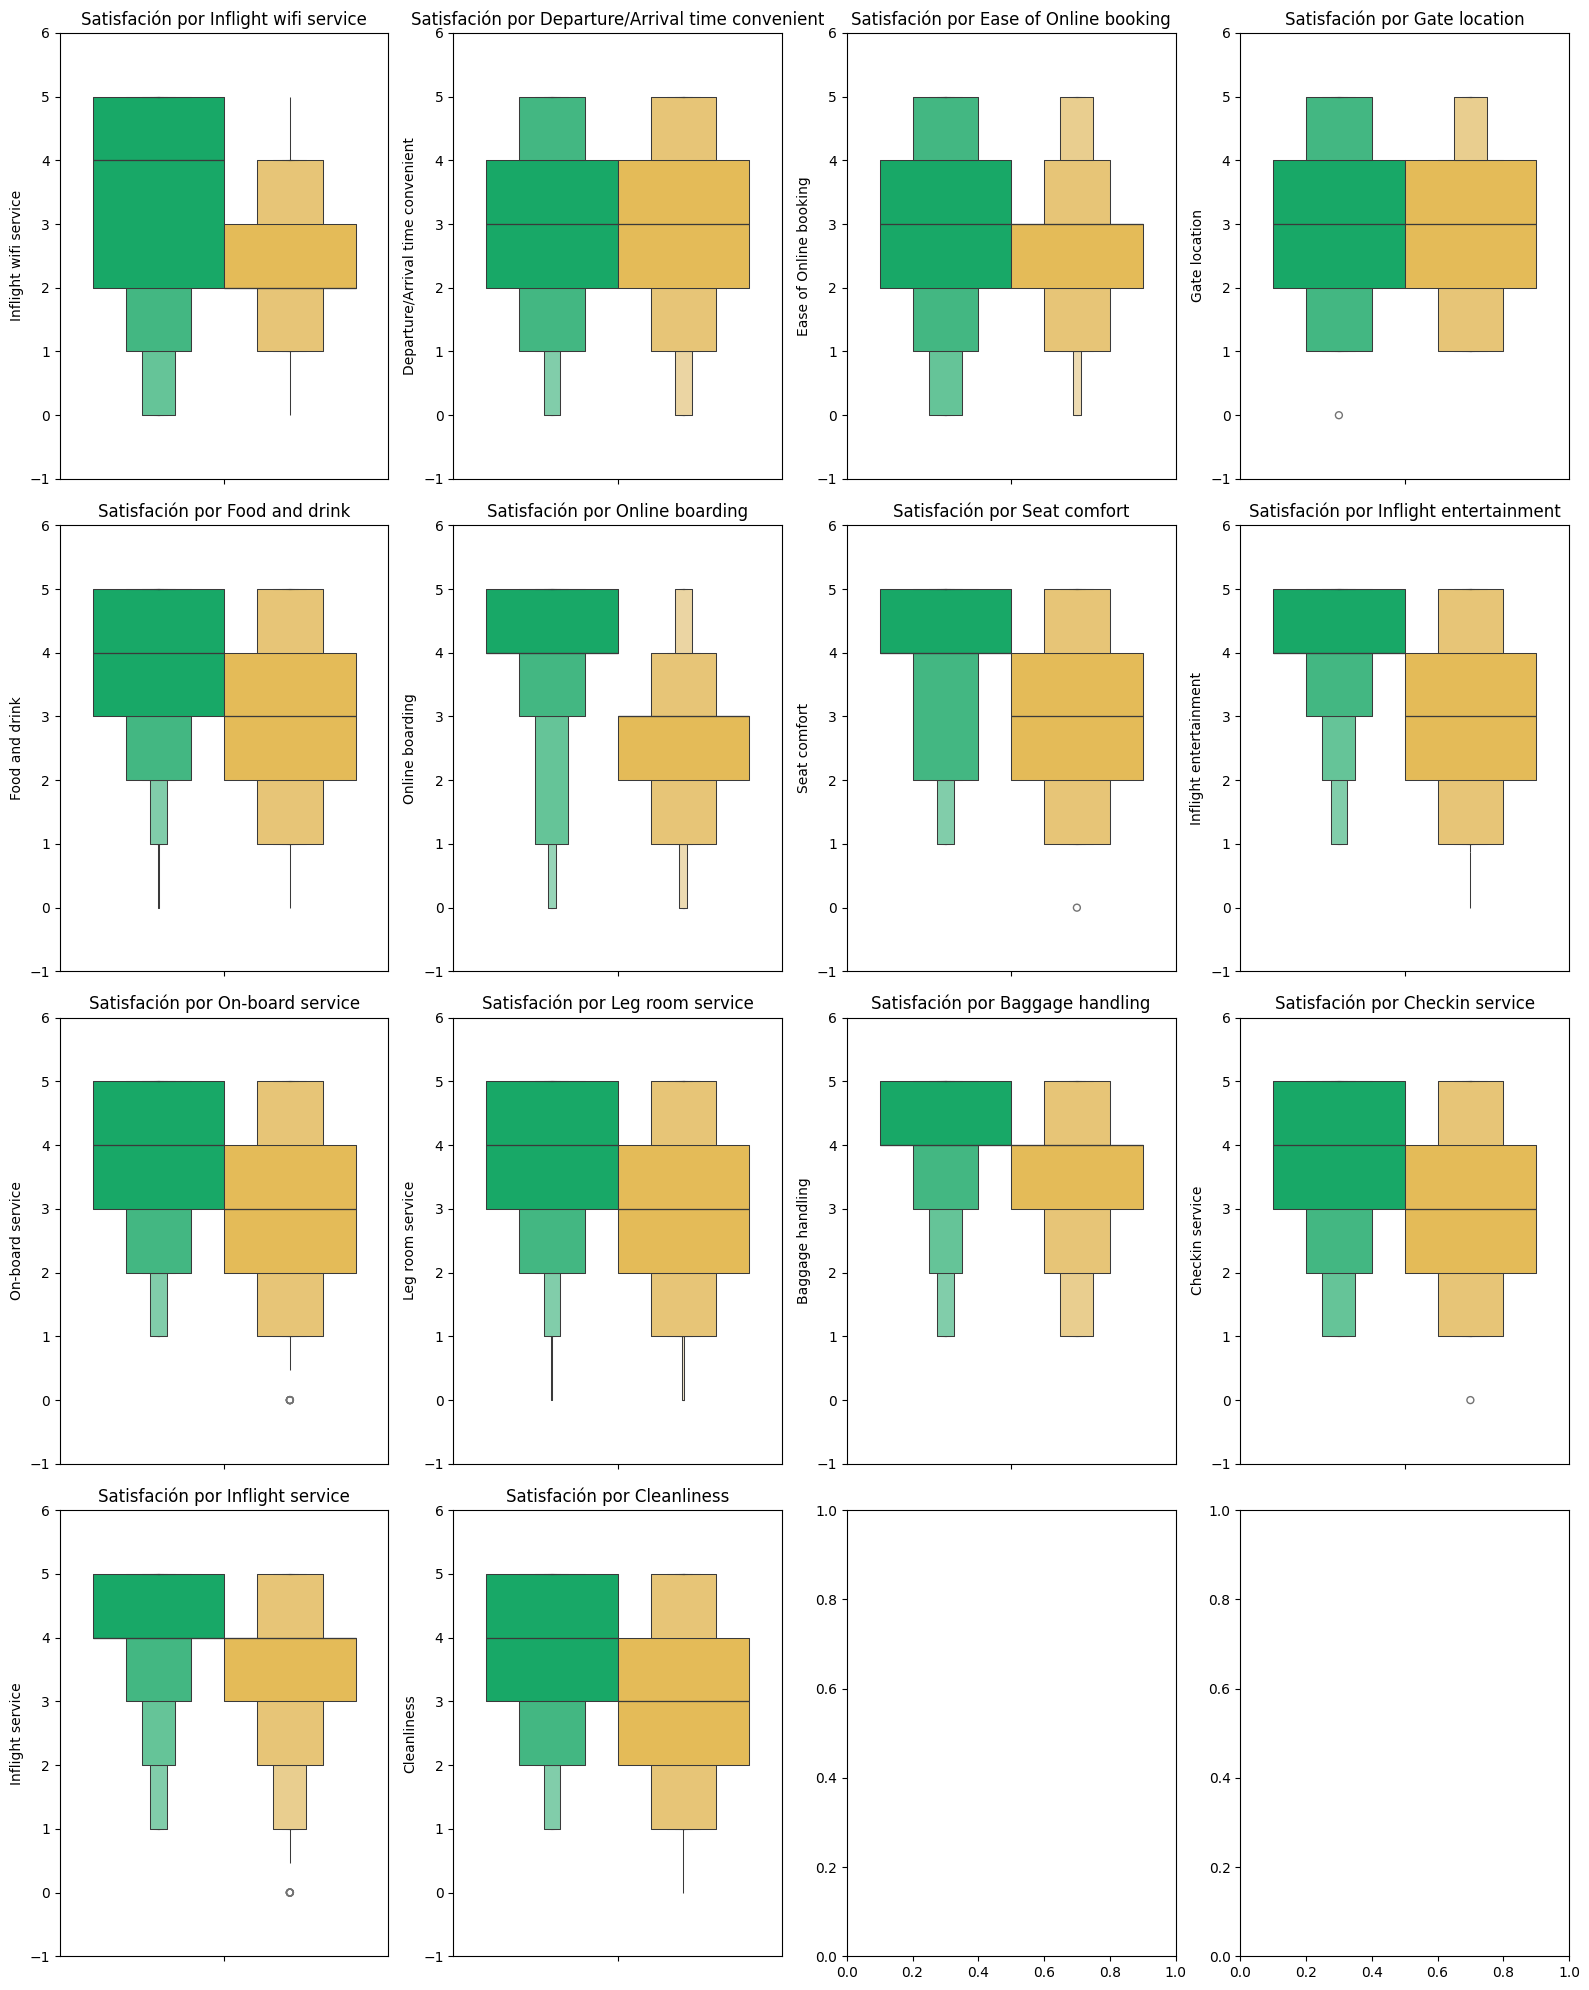

In [35]:
# Seleccionamos las columnas de valoración correspondientes a nuestra encuesta 
df_col_assessment = df.iloc[:, 8:22]

# Definimos un rango conmún del eje Y
commun_ylim = (-1, 6)

# Creamos nuestro grafico de cajas agrupadas en función de nuestras columnas de valoración
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 20))

axes = axes.flatten()

for i, col in enumerate(df_col_assessment.columns):
    sns.boxenplot(y=col, hue="satisfaction", data=df, palette=satisfaction_color, legend=False, ax=axes[i])
    axes[i].set_title(f"Satisfación por {col}")
    axes[i].set_ylim(commun_ylim)

plt.tight_layout()
plt.show()

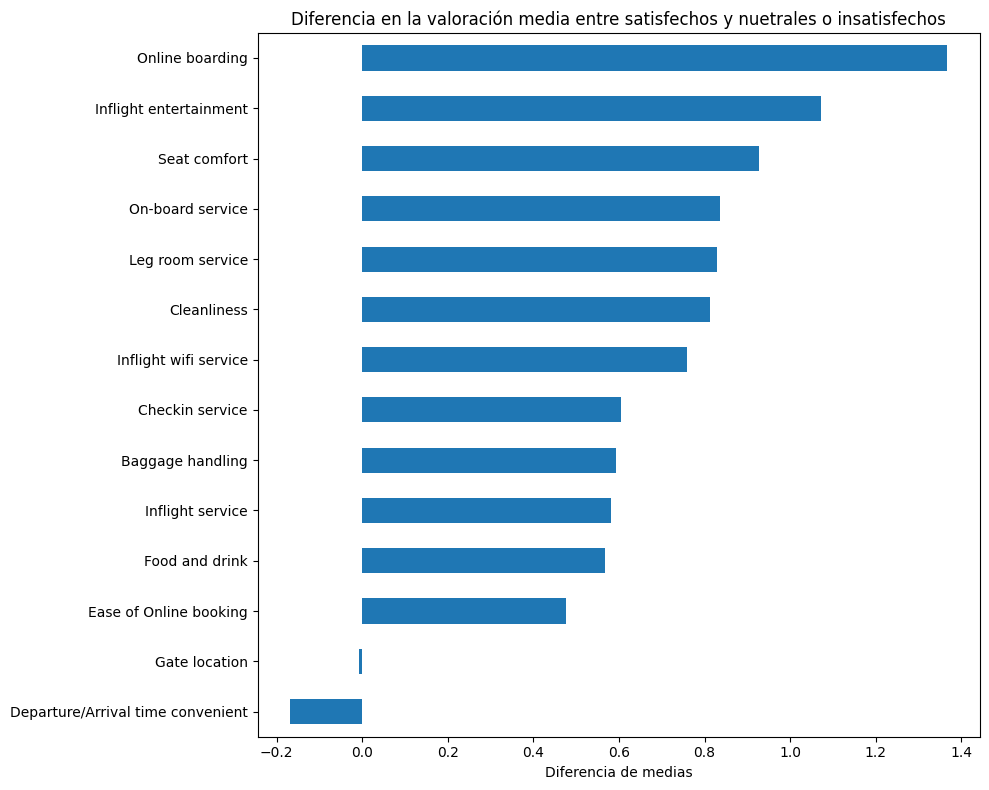

In [50]:
# Agrupamos y calculamos la media de cada variable por satisfacción
mean_satisfaction = df_col_assessment.groupby(df["satisfaction"]).mean().T

# Calcular la diferencia de medias entre satisfechos e insatisfechos
mean_satisfaction["difference"] = mean_satisfaction["satisfied"] - mean_satisfaction["neutral or dissatisfied"]

# Graficar la diferencia de medias
plt.figure(figsize=(10, 8))
mean_satisfaction["difference"].sort_values(ascending=True).plot(kind="barh")
plt.title("Diferencia en la valoración media entre satisfechos y nuetrales o insatisfechos")
plt.xlabel("Diferencia de medias")
plt.tight_layout()
plt.show()

**Observaciones:** La variable "Online boarding" presenta la mayor diferencia de media con un valor de 1.36, lo que indica que este factor es el que más influye en la satisfacción del cliente. Los pasajeros satisfechos tienden a valorar significativamente más la experiencia de embarque en línea en comparación con los clientes neutrales o insatisfechos, lo que sugiere que mejorar este servicio puede tener un impacto positivo importante en la satisfacción general.

La variable "Inflight entertainment" sigue con una diferencia de media de 1.07, lo que también la convierte en un factor clave para la satisfacción. Una clara preferencia por un entretenimiento de calidad durante el vuelo.

"Seat comfort", con una diferencia de media de 0.92, resalta como otro aspecto importante. Los pasajeros satisfechos tienden a valorar más la comodidad de los asientos, lo que sugiere que mejorar la comodidad puede mejorar la percepción del servicio.

Las variables "On-board service", "Leg room service", "Cleanliness" y "Inflight wifi service", con diferencias de media de 0.83, 0.82, 0.81 y 0.75, respectivamente, también juegan un rol relevante en la satisfacción de los pasajeros, aunque en menor medida en comparación con las anteriores. Estas áreas indican que los pasajeros satisfechos valoran más estos servicios que los nuetrales o insatisfechos, aunque no con la misma intensidad que los factores de mayor diferencia.